In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN for oversampled CSV

In [2]:
df = pd.read_csv('Final_oversampled.csv')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Sleep Disorder
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,3,1.654719,-1.619584,-0.330002,-0.268102,1
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,-0.459239,-0.755640,1
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,-0.459239,-0.755640,1
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,1.479309,0.869486,2
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,1.479309,0.869486,2


In [3]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure',
       'Sleep Disorder'],
      dtype='object')

In [4]:
x = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
k = int(input('Enter the value for k:'))
knn_classifier = KNeighborsClassifier(n_neighbors = k)

In [8]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn_classifier.predict(x_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.87      0.90      0.89        52
           2       0.95      0.78      0.86        51

    accuracy                           0.85       132
   macro avg       0.84      0.85      0.84       132
weighted avg       0.86      0.85      0.85       132



In [30]:
import pickle

pickle.dump(knn_classifier, open('knnmodel.pkl', 'wb'))

# KNN for balanced CSV

In [11]:
df1 = pd.read_csv('Balanced_Dataset.csv')
df1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,3,1.654719,-1.619584,1,-0.330002,-0.268102
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.755640
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.755640
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,0.869486
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,0.869486


In [12]:
x1 = df.drop(columns=['Sleep Disorder'])
y1 = df['Sleep Disorder']

In [13]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [14]:
k1 = int(input('Enter the value for k:'))
knn_classifier = KNeighborsClassifier(n_neighbors=k1)

In [15]:
knn_classifier.fit(x_train1, y_train1)

KNeighborsClassifier()

In [16]:
y_pred1 = knn_classifier.predict(x_test1)

In [17]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.87      0.90      0.89        52
           2       0.95      0.78      0.86        51

    accuracy                           0.85       132
   macro avg       0.84      0.85      0.84       132
weighted avg       0.86      0.85      0.85       132



# Hyperparameter Tuning

In [18]:
from sklearn import metrics
score = {}
score_list = []

In [19]:
for k in range(1,30):
  classifier1 = KNeighborsClassifier(n_neighbors = k, p = 2)
  classifier1.fit(x_train, y_train)
  y_pred1 = classifier1.predict(x_test)
  temp = metrics.accuracy_score(y_test, y_pred1)
  score[k] = temp
  score_list.append(temp)

In [20]:
# print(score_list)

Text(0, 0.5, 'Testing accuracy')

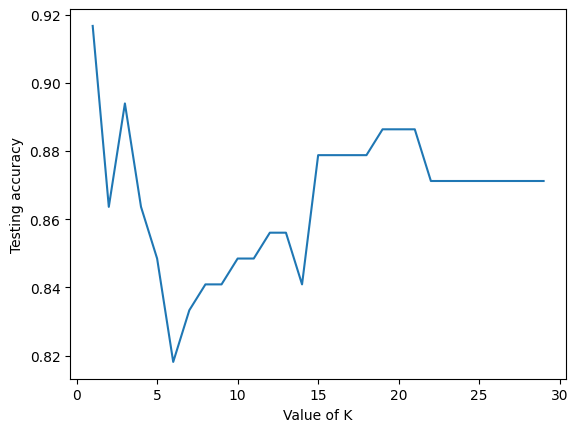

In [21]:
import matplotlib.pyplot as plt
k_range = range(1,30)
plt.plot(k_range, score_list)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
#plt.title('')

In [22]:
index = (score_list.index(max(score_list)))
print('Max value of k is',max(score_list),'at index',index + 1)

Max value of k is 0.9166666666666666 at index 1


# SVM for oversampled CSV

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv("Final_oversampled.csv")  # Replace "your_dataset.csv" with your actual file path

# Define features and target variable
x2 = df.drop(columns=['Sleep Disorder'])
y2 = df['Sleep Disorder']

# Splitting the dataset into the Training set and Test set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(x_train2, y_train2)

y_pred2 = svm_classifier.predict(x_test2)

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.88      0.96      0.92        52
           2       0.94      0.86      0.90        51

    accuracy                           0.89       132
   macro avg       0.88      0.87      0.87       132
weighted avg       0.89      0.89      0.89       132



In [24]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid: C values to test
param_grid = {'C': np.logspace(-3, 3, 7)}  # C values from 0.001 to 1000 in logarithmic scale

# Initialize the classifier
svm = SVC(kernel='linear')

# Setup the grid search
grid_search = GridSearchCV(svm, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(x_train2, y_train2)

# Best parameter and score
print("Best C:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best C: {'C': 0.1}
Best cross-validation score: 0.881904761904762


In [25]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import expon

# Define the parameter distribution: C values to sample
param_distributions = {'C': expon(scale=100)}  # C values sampled from an exponential distribution

# Initialize the classifier
svm = SVC(kernel='linear')

# Setup the random search
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=100, cv=5)

# Fit the random search to the data
random_search.fit(x_train2, y_train2)

# Best parameter and score
print("Best C:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


Best C: {'C': 1.0693146639336761}
Best cross-validation score: 0.881904761904762


# SVM for balanced CSV

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv("Balanced_Dataset.csv")  # Replace "your_dataset.csv" with your actual file path

# Define features and target variable
x3 = df.drop(columns=['Sleep Disorder'])
y3 = df['Sleep Disorder']

# Splitting the dataset into the Training set and Test set
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(x_train3, y_train3)

y_pred3 = svm_classifier.predict(x_test3)

print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.98      0.97        43
           2       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75



In [ ]:
import pickle

pickle.dump(svm_classifier, open('svmmodel.pkl', 'wb'))

In [27]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid: C values to test
param_grid = {'C': np.logspace(-3, 3, 7)}  # C values from 0.001 to 1000 in logarithmic scale

# Initialize the classifier
svm = SVC(kernel='linear')

# Setup the grid search
grid_search = GridSearchCV(svm, param_grid, cv=3)  # 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(x_train3, y_train3)

# Best parameter and score
print("Best C:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best C: {'C': 1.0}
Best cross-validation score: 0.9163299663299664


In [28]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import expon

# Define the parameter distribution: C values to sample
param_distributions = {'C': expon(scale=100)}  # C values sampled from an exponential distribution

# Initialize the classifier
svm = SVC(kernel='linear')

# Setup the random search
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=100, cv=3)

# Fit the random search to the data
random_search.fit(x_train3, y_train3)

# Best parameter and score
print("Best C:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best C: {'C': 0.5459748730685635}
Best cross-validation score: 0.923097643097643


c:\Users\Amay Doshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 12 features as input.

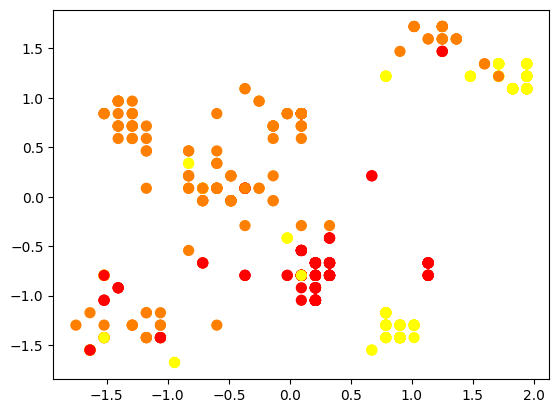

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Load the dataset
df = pd.read_csv("Final_oversampled.csv")  # Replace "your_dataset.csv" with your actual file path

# Define features and target variable
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Plot decision boundary
plt.scatter(X_train['Age'], X_train['Sleep Duration'], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(svm_classifier)

plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('SVM Decision Boundary')
plt.show()